# MobileNetV2で欅坂46とけやき坂46のメンバーの顔認識

In [1]:
import keras
from keras.applications.mobilenetv2 import MobileNetV2
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from utils.utils import load_data

%matplotlib inline

/home/ishiyama/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### モデルと学習の設定
EPOCHを200に設定した理由は、ある程度大きい数値、かつ、1エポックあたり40秒なので全体で2.2時間とトライ・アンド・エラーしやすかったため。  
テストとバリデーションのデータサイズはともに0.3（＝全体の30%）を指定した。

In [2]:
# モデルの設定
NUMBER_OF_MEMBERS = 41             # 漢字とひらがな合わせたメンバー数
CLASSES = NUMBER_OF_MEMBERS + 1    # one hot表現は0から始まるため

# 学習の設定
EPOCHS = 200
TEST_SIZE = 0.3
VALIDATION_SPLIT = 0.3

### データの読み込み

In [3]:
X, Y = load_data('/home/ishiyama/notebooks/keyakizaka_member_detection/image/mobilenet/')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, shuffle=True)

### モデル構築

In [4]:
model = MobileNetV2(include_top=True, weights=None, classes=CLASSES)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 学習させる

In [5]:
fit_result = model.fit(
    x=X_train,
    y=Y_train,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    verbose=2
)

Train on 6259 samples, validate on 2683 samples
Epoch 1/200
 - 46s - loss: 3.7551 - acc: 0.0529 - val_loss: 9.1315 - val_acc: 0.0198
Epoch 2/200
 - 39s - loss: 3.3451 - acc: 0.1313 - val_loss: 10.8515 - val_acc: 0.0287
Epoch 3/200
 - 40s - loss: 3.0294 - acc: 0.2042 - val_loss: 12.7392 - val_acc: 0.0335
Epoch 4/200
 - 40s - loss: 2.7277 - acc: 0.2611 - val_loss: 13.6880 - val_acc: 0.0373
Epoch 5/200
 - 40s - loss: 2.4477 - acc: 0.3318 - val_loss: 13.1667 - val_acc: 0.0481
Epoch 6/200
 - 40s - loss: 2.1615 - acc: 0.4074 - val_loss: 13.6501 - val_acc: 0.0455
Epoch 7/200
 - 40s - loss: 1.9062 - acc: 0.4692 - val_loss: 14.2927 - val_acc: 0.0335
Epoch 8/200
 - 41s - loss: 1.6010 - acc: 0.5451 - val_loss: 15.2581 - val_acc: 0.0287
Epoch 9/200
 - 41s - loss: 1.3527 - acc: 0.6161 - val_loss: 12.7826 - val_acc: 0.0656
Epoch 10/200
 - 41s - loss: 1.0813 - acc: 0.6824 - val_loss: 14.5500 - val_acc: 0.0362
Epoch 11/200
 - 40s - loss: 0.9202 - acc: 0.7287 - val_loss: 14.2073 - val_acc: 0.0440
Epoch

Epoch 96/200
 - 41s - loss: 0.0140 - acc: 0.9954 - val_loss: 3.4766 - val_acc: 0.5416
Epoch 97/200
 - 41s - loss: 0.0092 - acc: 0.9958 - val_loss: 2.9814 - val_acc: 0.5829
Epoch 98/200
 - 41s - loss: 0.0079 - acc: 0.9965 - val_loss: 2.7728 - val_acc: 0.6053
Epoch 99/200
 - 41s - loss: 0.0075 - acc: 0.9963 - val_loss: 2.6528 - val_acc: 0.6172
Epoch 100/200
 - 41s - loss: 0.0075 - acc: 0.9968 - val_loss: 2.5437 - val_acc: 0.6258
Epoch 101/200
 - 41s - loss: 0.0082 - acc: 0.9958 - val_loss: 2.4602 - val_acc: 0.6355
Epoch 102/200
 - 41s - loss: 0.0070 - acc: 0.9962 - val_loss: 2.4618 - val_acc: 0.6236
Epoch 103/200
 - 41s - loss: 0.0072 - acc: 0.9960 - val_loss: 2.4128 - val_acc: 0.6392
Epoch 104/200
 - 41s - loss: 0.0136 - acc: 0.9947 - val_loss: 3.5176 - val_acc: 0.5203
Epoch 105/200
 - 41s - loss: 0.6346 - acc: 0.8188 - val_loss: 10.7065 - val_acc: 0.1811
Epoch 106/200
 - 41s - loss: 0.1521 - acc: 0.9511 - val_loss: 9.3205 - val_acc: 0.2303
Epoch 107/200
 - 41s - loss: 0.0487 - acc: 0.9

Epoch 191/200
 - 41s - loss: 0.0056 - acc: 0.9970 - val_loss: 2.1868 - val_acc: 0.6470
Epoch 192/200
 - 41s - loss: 0.0055 - acc: 0.9963 - val_loss: 2.1677 - val_acc: 0.6452
Epoch 193/200
 - 41s - loss: 0.0057 - acc: 0.9962 - val_loss: 2.1426 - val_acc: 0.6526
Epoch 194/200
 - 41s - loss: 0.0058 - acc: 0.9963 - val_loss: 2.2137 - val_acc: 0.6422
Epoch 195/200
 - 41s - loss: 0.0056 - acc: 0.9965 - val_loss: 2.2083 - val_acc: 0.6474
Epoch 196/200
 - 41s - loss: 0.0059 - acc: 0.9963 - val_loss: 2.1507 - val_acc: 0.6418
Epoch 197/200
 - 41s - loss: 0.0057 - acc: 0.9968 - val_loss: 2.1942 - val_acc: 0.6388
Epoch 198/200
 - 41s - loss: 0.0065 - acc: 0.9965 - val_loss: 2.4510 - val_acc: 0.6221
Epoch 199/200
 - 41s - loss: 0.4682 - acc: 0.8735 - val_loss: 10.3348 - val_acc: 0.1558
Epoch 200/200
 - 41s - loss: 0.1581 - acc: 0.9506 - val_loss: 7.3699 - val_acc: 0.2616


### LossとAccuracyのグラフを表示する
（参考）[MNISTでハイパーパラメータをいじってloss/accuracyグラフを見てみる](https://qiita.com/hiroyuki827/items/213146d551a6e2227810)

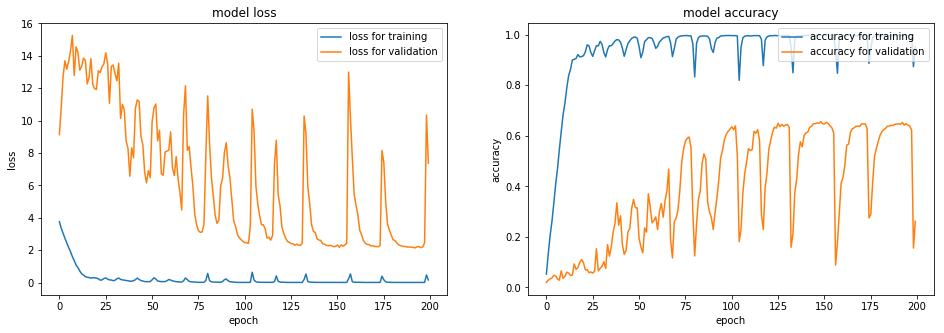

In [6]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(16,5))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="accuracy for training")
    axR.plot(fit.history['val_acc'],label="accuracy for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(fit_result)
plot_history_acc(fit_result)
plt.show()
plt.close()

周期的に精度が下がる原因を調査する。

### テストデータで精度を確認する

In [7]:
test_result = model.evaluate(
    x=X_test,
    y=Y_test
)
print('loss for test:', test_result[0])
print('accuracy for test:', test_result[1])

3833/3833 [==============================] - 5s 1ms/step
loss for test: 7.134275969593139
accuracy for test: 0.29272110618314634


### 今回学習したモデルを保存する

In [8]:
model.save('keyakizaka_member_detection_mobilenetv2.h5')